In [162]:
from time import sleep, strftime
from random import randint
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import smtplib
from datetime import *
from __future__ import division, print_function  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.pipeline import make_pipeline


sns.set()
%config InlineBackend.figure_formats = ['jpg'] 
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
import statsmodels.api as sm


from __future__ import division, print_function 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)


In [86]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [87]:
flights1 = pd.read_csv('20210927-1710_flights_LNK-ZRH_from_2021-12-12_to_2021-12-26.csv')
flights2 = pd.read_csv('20210927-1719_flights_LNK-ZRH_from_2021-12-19_to_2022-01-02.csv')
flights3 = pd.read_csv('20210927-1728_flights_LNK-ZRH_from_2022-01-16_to_2022-01-30.csv')
flights4 = pd.read_csv('20210927-1737_flights_LNK-ZRH_from_2021-11-07_to_2021-11-21.csv')
flights5 = pd.read_csv('20210927-1752_flights_LNK-ZRH_from_2021-11-14_to_2021-11-28.csv')
flights6 = pd.read_csv('20210927-1802_flights_LNK-ZRH_from_2021-12-05_to_2021-12-19.csv')
flights7 = pd.read_csv('20210927-1810_flights_LNK-ZRH_from_2022-01-02_to_2022-01-16.csv')
flights8 = pd.read_csv('20210927-1819_flights_LNK-ZRH_from_2022-01-09_to_2022-01-23.csv')
flights9 = pd.read_csv('20210927-1827_flights_LNK-ZRH_from_2021-10-10_to_2021-10-24.csv')
flights10 = pd.read_csv('20210927-1836_flights_LNK-ZRH_from_2021-10-17_to_2021-10-31.csv')
flights11 = pd.read_csv('20210927-1912_flights_LNK-ZRH_from_2022-01-23_to_2022-02-06.csv')
flights12 = pd.read_csv('20210927-1921_flights_LNK-ZRH_from_2022-01-30_to_2022-02-13.csv')
flights13 = pd.read_csv('20210927-1929_flights_LNK-ZRH_from_2022-02-06_to_2022-02-20.csv')
flights14 = pd.read_csv('20210927-2004_flights_LNK-ZRH_from_2022-02-13_to_2022-02-27.csv')
flights15 = pd.read_csv('20210927-2036_flights_LNK-ZRH_from_2022-02-20_to_2022-03-06.csv')
flights16 = pd.read_csv('20210927-2045_flights_LNK-ZRH_from_2022-02-27_to_2022-03-13.csv')
flights17 = pd.read_csv('20210927-2053_flights_LNK-ZRH_from_2022-03-06_to_2022-03-20.csv')
flights18 = pd.read_csv('20210927-2102_flights_LNK-ZRH_from_2022-03-13_to_2022-03-27.csv')
flights19 = pd.read_csv('20210927-2111_flights_LNK-ZRH_from_2022-03-20_to_2022-04-03.csv')
flights20 = pd.read_csv('20210927-2120_flights_LNK-ZRH_from_2022-03-27_to_2022-04-10.csv')
flights21 = pd.read_csv('20210927-2147_flights_LNK-ZRH_from_2022-04-03_to_2022-04-17.csv')
flights22 = pd.read_csv('20210927-2156_flights_LNK-ZRH_from_2022-04-10_to_2022-04-24.csv')

flights = flights1.append(flights2).append(flights3).append(flights4).append(flights5).append(flights6).append(flights7).append(flights8).append(flights9).append(flights10).append(flights11).append(flights12).append(flights13).append(flights14).append(flights15).append(flights16).append(flights17).append(flights18).append(flights19).append(flights20).append(flights21).append(flights22)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 45
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out Day             1027 non-null   object
 1   Out Depart Time     1027 non-null   object
 2   Out Arrive Time     1027 non-null   object
 3   Out Weekday         1027 non-null   object
 4   Out Airline         1027 non-null   object
 5   Out Duration        1027 non-null   object
 6   Out Stops           1027 non-null   object
 7   Out Stop Cities     1027 non-null   object
 8   Return Day          1027 non-null   object
 9   Return Depart Time  1027 non-null   object
 10  Return Arrive Time  1027 non-null   object
 11  Return Weekday      1027 non-null   object
 12  Return Airline      1027 non-null   object
 13  Return Duration     1027 non-null   object
 14  Return Stops        1027 non-null   object
 15  Return Stop Cities  1027 non-null   object
 16  Price               1027 n

In [88]:
flights.head()

,Out Day,Out Depart Time,Out Arrive Time,Out Weekday,Out Airline,Out Duration,Out Stops,Out Stop Cities,Return Day,Return Depart Time,Return Arrive Time,Return Weekday,Return Airline,Return Duration,Return Stops,Return Stop Cities,Price,timestamp,sort
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price


In [89]:
(flights.groupby(['Out Day',"Out Depart Time","Out Airline","Out Stop Cities", "Out Duration", 'Return Day',"Return Depart Time","Return Airline","Return Stop Cities", "Return Duration"]).Price.count()
 .reset_index()
 .sort_values("Price", ascending = False)).head(20)

,Out Day,Out Depart Time,Out Airline,Out Stop Cities,Out Duration,Return Day,Return Depart Time,Return Airline,Return Stop Cities,Return Duration,Price
369,12/3,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
377,12/5,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
438,2/20,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
450,2/23,3:09 pm,United Airlines,ORD,12h 51m,3/3,1:20 pm,United Airlines,ORD,14h 59m,3
440,2/20,3:09 pm,United Airlines,ORD,12h 51m,3/7,1:20 pm,United Airlines,ORD,14h 59m,3
451,2/23,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
94,1/30,3:09 pm,United Airlines,ORD,12h 51m,2/15,12:30 pm,United Airlines,"YYZ, ORD",32h 49m,3
347,12/2,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
430,2/19,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
374,12/4,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3


In [90]:
flights.drop_duplicates(subset=['Out Day',"Out Depart Time","Out Airline","Out Stop Cities", "Out Duration", 'Return Day',"Return Depart Time","Return Airline","Return Stop Cities", "Return Duration"], inplace = True)

In [91]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out Day             738 non-null    object
 1   Out Depart Time     738 non-null    object
 2   Out Arrive Time     738 non-null    object
 3   Out Weekday         738 non-null    object
 4   Out Airline         738 non-null    object
 5   Out Duration        738 non-null    object
 6   Out Stops           738 non-null    object
 7   Out Stop Cities     738 non-null    object
 8   Return Day          738 non-null    object
 9   Return Depart Time  738 non-null    object
 10  Return Arrive Time  738 non-null    object
 11  Return Weekday      738 non-null    object
 12  Return Airline      738 non-null    object
 13  Return Duration     738 non-null    object
 14  Return Stops        738 non-null    object
 15  Return Stop Cities  738 non-null    object
 16  Price               738 non

In [92]:
flights = flights.rename(
    columns={
        'Out Day': 'Out_Day',
        'Out Weekday': 'Out_Weekday',
        'Out Duration': 'Out_Duration',
        'Return Day': 'Return_Day',
        'Return Weekday': 'Return_Weekday',
        'Return Duration': 'Return_Duration',
        'Out Stops': 'Out_Stops',
        'Out Stop Cities': 'Out_Stop_Cities',
        'Return Stops': 'Return_Stops',
        'Return Stop Cities': 'Return_Stop_Cities',
        'Out Depart Time': 'Out_Depart_Time',
        'Out Arrive Time': 'Out_Arrive_Time',
        'Out Airline': 'Out_Airline',
        'Return Depart Time': 'Return_Depart_Time',
        'Return Arrive Time':'Return_Arrive_Time',
        'Return Airline': 'Return_Airline',
        'Price': 'Price'})

In [93]:
(flights.groupby(["Price"])).head(20)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,Return_Arrive_Time,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,4/8,3:09 pm,10:45 am +1,Fri,United Airlines,12h 36m,1 stop,ORD,4/24,9:50 am,5:10 pm,Sun,United Airlines,14h 20m,1 stop,ORD,"1,198",20210927-2155,fast
42,4/12,3:09 pm,10:45 am +1,Tue,United Airlines,12h 36m,1 stop,ORD,4/27,9:50 am,5:10 pm,Wed,United Airlines,14h 20m,1 stop,ORD,"2,868",20210927-2155,fast
43,4/13,3:09 pm,10:45 am +1,Wed,United Airlines,12h 36m,1 stop,ORD,4/27,9:50 am,5:10 pm,Wed,United Airlines,14h 20m,1 stop,ORD,"2,868",20210927-2155,fast
44,4/9,3:09 pm,10:45 am +1,Sat,United Airlines,12h 36m,1 stop,ORD,4/24,9:50 am,5:10 pm,Sun,United Airlines,14h 20m,1 stop,ORD,"3,168",20210927-2155,fast


In [94]:
flights["Out_Arrive_Day"] = flights.Out_Arrive_Time.str[-2:]
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,Return_Arrive_Time,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1


In [95]:
flights.groupby(["Out_Arrive_Day"]).tail(20)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,Return_Arrive_Time,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day
7,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/19,12:30 pm,2:19 pm +1,Wed,United Airlines,32h 49m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
8,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/18,12:30 pm,2:19 pm +1,Tue,United Airlines,32h 49m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
9,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/17,12:30 pm,5:10 pm +1,Mon,United Airlines,35h 40m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
19,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/13,1:05 pm,9:19 pm,Thu,United Airlines,15h 14m,1 stop,ORD,583,20210927-1803,best,+2
3,10/11,2:00 pm,10:30 am +2,Mon,United Airlines,37h 30m,2 stops,"DEN, YYZ",10/24,1:05 pm,2:39 pm +1,Sun,United Airlines,32h 34m,2 stops,"YYZ, ORD",566,20210927-1823,price,+2
14,10/15,6:04 pm,10:55 am +2,Fri,United Airlines,33h 51m,2 stops,"ORD, MIA",11/1,12:30 pm,2:35 pm +1,Mon,United Airlines,32h 05m,2 stops,"YYZ, ORD",565,20210927-1832,price,+2
5,2/18,5:55 pm,11:00 am +2,Fri,United Airlines,34h 05m,1 stop,ORD,3/7,12:30 pm,9:19 pm +1,Mon,United Airlines,39h 49m,2 stops,"YYZ, ORD",569,20210927-2032,price,+2
11,4/13,11:20 am,7:55 am +1,Wed,United Airlines,13h 35m,1 stop,ORD,4/22,9:50 am,5:10 pm,Fri,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1
12,4/10,7:59 am,7:55 am +1,Sun,United Airlines,16h 56m,1 stop,ORD,4/25,9:50 am,5:10 pm,Mon,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1
13,4/11,7:59 am,7:55 am +1,Mon,United Airlines,16h 56m,1 stop,ORD,4/25,9:50 am,5:10 pm,Mon,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1


In [96]:
flights["Return_Arrive_Day"] = flights.Return_Arrive_Time.str[-2:]
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm


In [97]:
flights['Return_Arrive_Day'] = flights['Return_Arrive_Day'].str.strip('+apm')
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,


In [98]:
flights['Out_Arrive_Day'] = flights['Out_Arrive_Day'].str.strip('+apm')

In [99]:
flights.head()

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,


In [100]:
flights['Return_Stops'] = flights['Return_Stops'].str.strip('stops')
flights['Out_Stops'] = flights['Out_Stops'].str.strip('stops')
flights['Return_Stops']=flights['Return_Stops'].astype(int)
flights['Out_Stops']=flights['Out_Stops'].astype(int)
flights

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,4/8,3:09 pm,10:45 am +1,Fri,United Airlines,12h 36m,1,ORD,4/24,9:50 am,...,Sun,United Airlines,14h 20m,1,ORD,"1,198",20210927-2155,fast,1,
42,4/12,3:09 pm,10:45 am +1,Tue,United Airlines,12h 36m,1,ORD,4/27,9:50 am,...,Wed,United Airlines,14h 20m,1,ORD,"2,868",20210927-2155,fast,1,
43,4/13,3:09 pm,10:45 am +1,Wed,United Airlines,12h 36m,1,ORD,4/27,9:50 am,...,Wed,United Airlines,14h 20m,1,ORD,"2,868",20210927-2155,fast,1,
44,4/9,3:09 pm,10:45 am +1,Sat,United Airlines,12h 36m,1,ORD,4/24,9:50 am,...,Sun,United Airlines,14h 20m,1,ORD,"3,168",20210927-2155,fast,1,


In [101]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out_Day             738 non-null    object
 1   Out_Depart_Time     738 non-null    object
 2   Out_Arrive_Time     738 non-null    object
 3   Out_Weekday         738 non-null    object
 4   Out_Airline         738 non-null    object
 5   Out_Duration        738 non-null    object
 6   Out_Stops           738 non-null    int64 
 7   Out_Stop_Cities     738 non-null    object
 8   Return_Day          738 non-null    object
 9   Return_Depart_Time  738 non-null    object
 10  Return_Arrive_Time  738 non-null    object
 11  Return_Weekday      738 non-null    object
 12  Return_Airline      738 non-null    object
 13  Return_Duration     738 non-null    object
 14  Return_Stops        738 non-null    int64 
 15  Return_Stop_Cities  738 non-null    object
 16  Price               738 non

In [102]:
def find_num(string):
    num_list = [i for i in string if i.isnumeric()]
    if len(num_list) > 1:
        num_list = ''.join(num_list)
        num_list = num_list.replace(',', '')
    else:
        num_list = ''.join(num_list)
    return num_list


In [103]:
flights['Price'] = flights['Price'].astype(str)
flights['Price'] = flights.Price.map(lambda x: int(find_num(x)))

In [104]:
flights["Out_Depart_Time"] = (pd.to_datetime(flights['Out_Depart_Time'],format="%I:%M %p", exact = False))
flights["Out_Depart_Time"] = [time.time() for time in flights['Out_Depart_Time']]
flights['Out_Depart_Time'] = flights['Out_Depart_Time'].astype(str)
flights["Out_Depart_Time"] = flights.Out_Depart_Time.map(lambda x: int(find_num(x)))

flights["Out_Arrive_Time"] = (pd.to_datetime(flights['Out_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Out_Arrive_Time"] = [time.time() for time in flights['Out_Arrive_Time']]
flights['Out_Arrive_Time'] = flights['Out_Arrive_Time'].astype(str)
flights["Out_Arrive_Time"] = flights.Out_Arrive_Time.map(lambda x: int(find_num(x)))

flights["Return_Depart_Time"] = (pd.to_datetime(flights['Return_Depart_Time'],format="%I:%M %p", exact = False))
flights["Return_Depart_Time"] = [time.time() for time in flights['Return_Depart_Time']]
flights['Return_Depart_Time'] = flights['Return_Depart_Time'].astype(str)
flights["Return_Depart_Time"] = flights.Return_Depart_Time.map(lambda x: int(find_num(x)))

flights["Return_Arrive_Time"] = (pd.to_datetime(flights['Return_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Return_Arrive_Time"] = [time.time() for time in flights['Return_Arrive_Time']]
flights['Return_Arrive_Time'] = flights['Return_Arrive_Time'].astype(str)
flights["Return_Arrive_Time"] = flights.Return_Arrive_Time.map(lambda x: int(find_num(x)))


In [105]:
flights['Out_Duration'] = flights['Out_Duration'].astype(str)
flights["Out_Hours"] = [value.split('h')[0] for value in flights['Out_Duration']]
flights['Out_Hours'] = flights['Out_Hours'].astype(int)
flights["Out_Minute"] = [value.split('h')[1] for value in flights['Out_Duration']]
flights['Out_Minute'] = flights.Out_Minute.map(lambda x: int(find_num(x)))
flights["Out_Minute"] = flights['Out_Minute'].astype(int)

flights['Out_Duration'] = flights['Out_Hours']+(flights['Out_Minute']/60)

flights['Return_Duration'] = flights['Return_Duration'].astype(str)
flights["Return_Hours"] = [value.split('h')[0] for value in flights['Return_Duration']]
flights['Return_Hours'] = flights['Return_Hours'].astype(int)
flights["Return_Minute"] = [value.split('h')[1] for value in flights['Return_Duration']]
flights['Return_Minute'] = flights.Return_Minute.map(lambda x: int(find_num(x)))
flights["Return_Minute"] = flights['Return_Minute'].astype(int)

flights['Return_Duration'] = flights['Return_Hours']+(flights['Return_Minute']/60)

In [106]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Out_Day             738 non-null    object 
 1   Out_Depart_Time     738 non-null    int64  
 2   Out_Arrive_Time     738 non-null    int64  
 3   Out_Weekday         738 non-null    object 
 4   Out_Airline         738 non-null    object 
 5   Out_Duration        738 non-null    float64
 6   Out_Stops           738 non-null    int64  
 7   Out_Stop_Cities     738 non-null    object 
 8   Return_Day          738 non-null    object 
 9   Return_Depart_Time  738 non-null    int64  
 10  Return_Arrive_Time  738 non-null    int64  
 11  Return_Weekday      738 non-null    object 
 12  Return_Airline      738 non-null    object 
 13  Return_Duration     738 non-null    float64
 14  Return_Stops        738 non-null    int64  
 15  Return_Stop_Cities  738 non-null    object 
 16  Price    

In [107]:
flights['Out_Day'] = flights['Out_Day'].astype(str)
flights["Out_Month"] = [value.split('/')[0] for value in flights['Out_Day']]
flights['Out_Month'] = flights['Out_Month'].astype(int)
flights["Out_Day"] = [value.split('/')[1] for value in flights['Out_Day']]
flights['Out_Day'] = flights.Out_Day.map(lambda x: int(find_num(x)))
flights["Out_Day"] = flights['Out_Day'].astype(str)
flights['Out_Year'] = '2022'
flights.loc[flights['Out_Month'] >= 10, 'Out_Year'] = '2021'
flights['Out_Year'] = flights['Out_Year'].astype(str)


"""for val in flights['Out_Month']:
    if val >= 10:
        flights['Out_Year'] = '2021'
    else:
        flights['Out_Year'] = '22'"""
flights['Out_Month'] = flights['Out_Month'].astype(str)
flights['Out_Date'] = flights['Out_Year'].astype(str)+ '/' + flights['Out_Month'].astype(str) + '/' + flights['Out_Day'].astype(str) 


flights['Return_Day'] = flights['Return_Day'].astype(str)
flights["Return_Month"] = [value.split('/')[0] for value in flights['Return_Day']]
flights['Return_Month'] = flights['Return_Month'].astype(int)
flights["Return_Day"] = [value.split('/')[1] for value in flights['Return_Day']]
flights['Return_Day'] = flights.Return_Day.map(lambda x: int(find_num(x)))
flights["Return_Day"] = flights['Return_Day'].astype(str)
flights['Return_Year'] = '2022'
flights.loc[flights['Return_Month'] >= 10, 'Return_Year'] = '2021'
flights['Return_Year'] = flights['Return_Year'].astype(str)

"""for val in flights['Return_Month']:
    if val >= 10:
        flights['Return_Year'] = '21'
    else:
        flights['Return_Year'] = '22'"""
flights['Return_Month'] = flights['Return_Month'].astype(str)
flights['Return_Date'] = flights['Return_Year'].astype(str) + '/' + flights['Return_Month'].astype(str) + '/' + flights['Return_Day'].astype(str)



In [108]:
flights['Out_Date'] = pd.to_datetime(flights.Out_Date, infer_datetime_format=True)
flights['Return_Date'] = pd.to_datetime(flights.Return_Date, infer_datetime_format=True)

In [109]:
flights

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Out_Hours,Out_Minute,Return_Hours,Return_Minute,Out_Month,Out_Year,Out_Date,Return_Month,Return_Year,Return_Date
0,12,150500,105000,Sun,United Airlines,12.750000,1,ORD,26,72000,...,12,45,17,15,12,2021,2021-12-12,12,2021,2021-12-26
1,12,150500,105000,Sun,United Airlines,12.750000,1,ORD,26,72000,...,12,45,17,15,12,2021,2021-12-12,12,2021,2021-12-26
2,12,112300,105000,Sun,United Airlines,16.450000,1,ORD,26,72000,...,16,27,17,15,12,2021,2021-12-12,12,2021,2021-12-26
3,12,112300,105000,Sun,United Airlines,16.450000,1,ORD,26,72000,...,16,27,17,15,12,2021,2021-12-12,12,2021,2021-12-26
4,12,80000,105000,Sun,United Airlines,19.833333,1,ORD,26,72000,...,19,50,17,15,12,2021,2021-12-12,12,2021,2021-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,8,150900,104500,Fri,United Airlines,12.600000,1,ORD,24,95000,...,12,36,14,20,4,2022,2022-04-08,4,2022,2022-04-24
42,12,150900,104500,Tue,United Airlines,12.600000,1,ORD,27,95000,...,12,36,14,20,4,2022,2022-04-12,4,2022,2022-04-27
43,13,150900,104500,Wed,United Airlines,12.600000,1,ORD,27,95000,...,12,36,14,20,4,2022,2022-04-13,4,2022,2022-04-27
44,9,150900,104500,Sat,United Airlines,12.600000,1,ORD,24,95000,...,12,36,14,20,4,2022,2022-04-09,4,2022,2022-04-24


In [110]:
flights['Today'] = pd.to_datetime("today")
flights['Days_to_Trip'] = flights['Out_Date'] - flights['Today']
flights['Days_to_Trip'] = flights['Days_to_Trip'].astype(str)
flights["Days_to_Trip"] = [value.split('d')[0] for value in flights['Days_to_Trip']]
flights['Days_to_Trip'] = flights['Days_to_Trip'].astype(int)

In [111]:
flights

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Hours,Return_Minute,Out_Month,Out_Year,Out_Date,Return_Month,Return_Year,Return_Date,Today,Days_to_Trip
0,12,150500,105000,Sun,United Airlines,12.750000,1,ORD,26,72000,...,17,15,12,2021,2021-12-12,12,2021,2021-12-26,2021-09-30 17:00:44.744154,72
1,12,150500,105000,Sun,United Airlines,12.750000,1,ORD,26,72000,...,17,15,12,2021,2021-12-12,12,2021,2021-12-26,2021-09-30 17:00:44.744154,72
2,12,112300,105000,Sun,United Airlines,16.450000,1,ORD,26,72000,...,17,15,12,2021,2021-12-12,12,2021,2021-12-26,2021-09-30 17:00:44.744154,72
3,12,112300,105000,Sun,United Airlines,16.450000,1,ORD,26,72000,...,17,15,12,2021,2021-12-12,12,2021,2021-12-26,2021-09-30 17:00:44.744154,72
4,12,80000,105000,Sun,United Airlines,19.833333,1,ORD,26,72000,...,17,15,12,2021,2021-12-12,12,2021,2021-12-26,2021-09-30 17:00:44.744154,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,8,150900,104500,Fri,United Airlines,12.600000,1,ORD,24,95000,...,14,20,4,2022,2022-04-08,4,2022,2022-04-24,2021-09-30 17:00:44.744154,189
42,12,150900,104500,Tue,United Airlines,12.600000,1,ORD,27,95000,...,14,20,4,2022,2022-04-12,4,2022,2022-04-27,2021-09-30 17:00:44.744154,193
43,13,150900,104500,Wed,United Airlines,12.600000,1,ORD,27,95000,...,14,20,4,2022,2022-04-13,4,2022,2022-04-27,2021-09-30 17:00:44.744154,194
44,9,150900,104500,Sat,United Airlines,12.600000,1,ORD,24,95000,...,14,20,4,2022,2022-04-09,4,2022,2022-04-24,2021-09-30 17:00:44.744154,190


In [112]:
flights['Return_Duration_Neg_Decay'] = flights['Return_Duration']*(-1)*flights['Return_Duration']

In [214]:
price_list = []
for val in flights["Price"]:
    price_list.append(val)
price_list.sort(reverse=True)
price_list
np.mean(price_list)
stats.mode(price_list)

ModeResult(mode=array([578]), count=array([210]))

In [114]:
flights_pricesdrpd = flights[flights.Price <= 2000]
price_list2 = []
for val in flights_pricesdrpd["Price"]:
    price_list2.append(val)
price_list2.sort(reverse=True)
price_list2

[1824,
 1824,
 1824,
 1824,
 1764,
 1764,
 1674,
 1674,
 1614,
 1614,
 1614,
 1588,
 1588,
 1559,
 1559,
 1538,
 1538,
 1538,
 1534,
 1503,
 1457,
 1371,
 1278,
 1269,
 1269,
 1269,
 1269,
 1251,
 1248,
 1248,
 1248,
 1248,
 1248,
 1248,
 1244,
 1244,
 1244,
 1238,
 1212,
 1202,
 1202,
 1198,
 1198,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1179,
 1174,
 1174,
 1174,
 1173,
 1168,
 1138,
 1138,
 1138,
 1138,
 1127,
 1127,
 1113,
 1088,
 1084,
 1084,
 1078,
 1078,
 1078,
 1073,
 1053,
 1053,
 1028,
 1028,
 1018,
 1018,
 988,
 978,
 978,
 964,
 964,
 954,
 954,
 954,
 952,
 952,
 952,
 952,
 948,
 934,
 934,
 934,
 934,
 934,
 934,
 934,
 934,
 928,
 928,
 928,
 913,
 903,
 903,
 893,
 883,
 878,
 878,
 878,
 878,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 874,
 849,
 849,
 829,
 828,
 828,
 828,
 828,
 828,
 828,
 828,
 800,
 788,
 788,
 788,
 788,
 774,
 774,
 774,
 774,
 774,
 774,
 756,
 749,
 749,
 749,
 749,
 749,
 

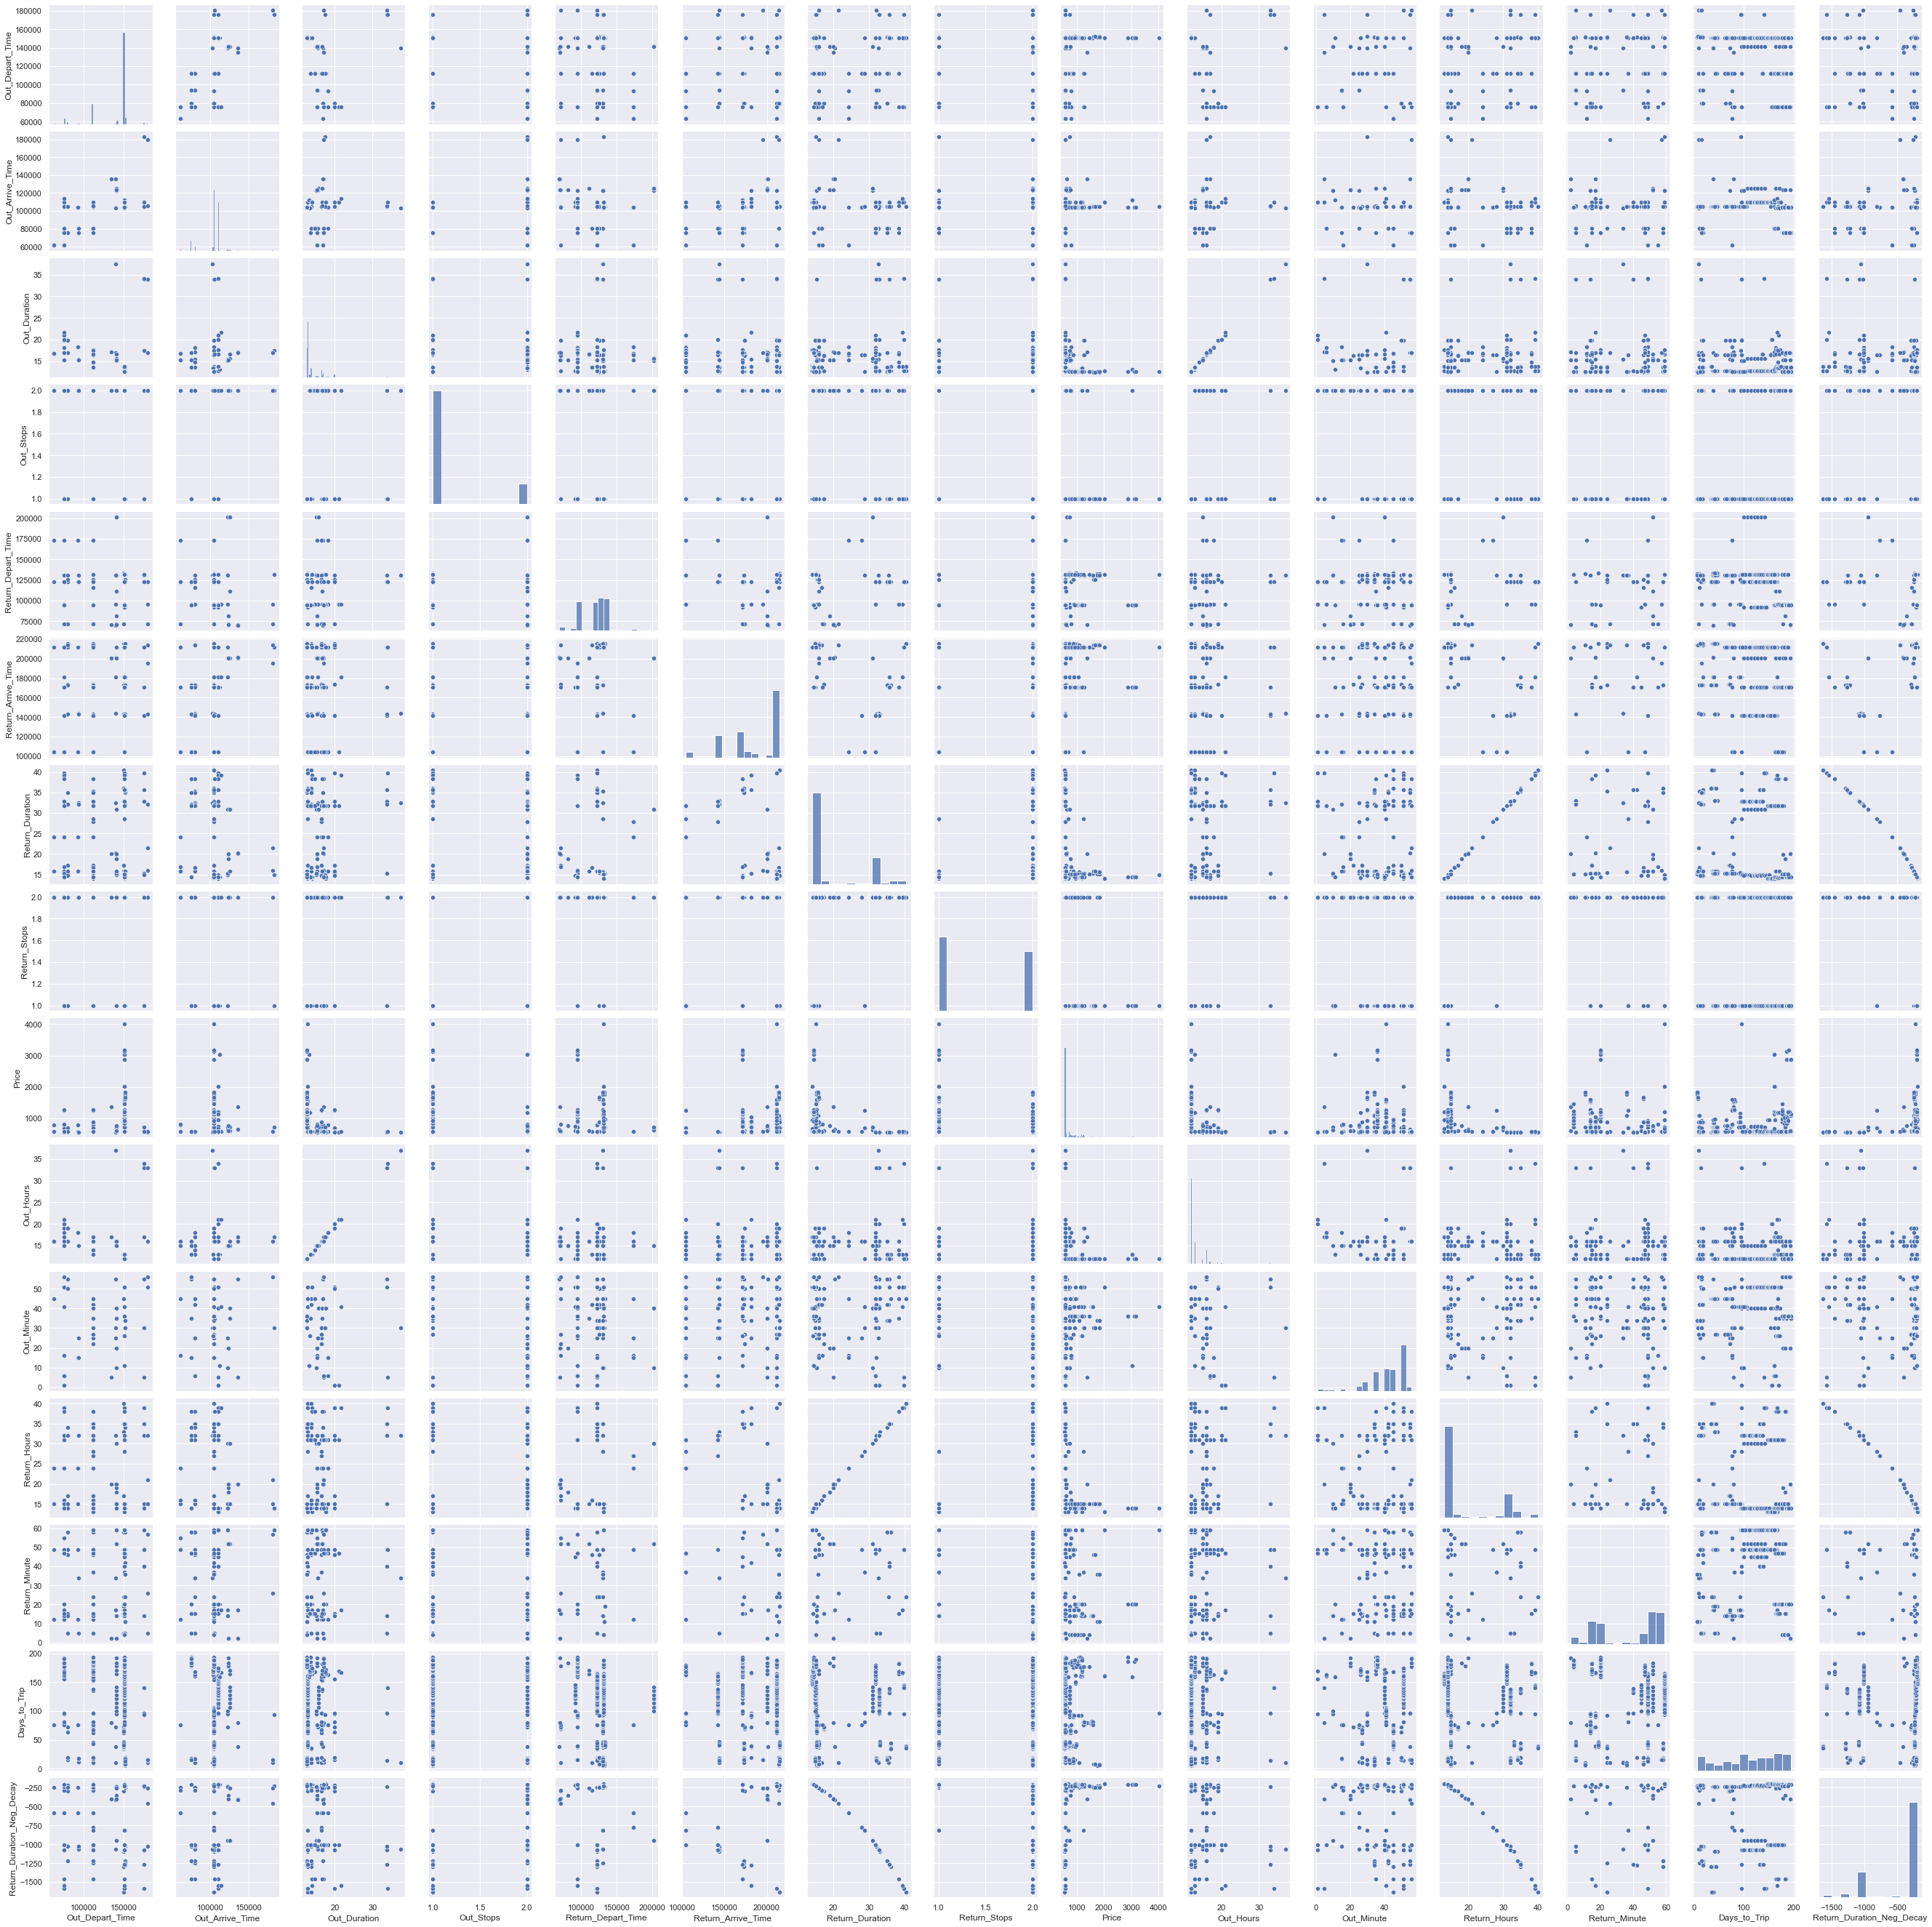

In [115]:
sns.pairplot(flights)

In [116]:
flights_df = flights.copy()

In [117]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Out_Day                    738 non-null    object        
 1   Out_Depart_Time            738 non-null    int64         
 2   Out_Arrive_Time            738 non-null    int64         
 3   Out_Weekday                738 non-null    object        
 4   Out_Airline                738 non-null    object        
 5   Out_Duration               738 non-null    float64       
 6   Out_Stops                  738 non-null    int64         
 7   Out_Stop_Cities            738 non-null    object        
 8   Return_Day                 738 non-null    object        
 9   Return_Depart_Time         738 non-null    int64         
 10  Return_Arrive_Time         738 non-null    int64         
 11  Return_Weekday             738 non-null    object        
 12  Return_Ai

In [118]:
flights_small = flights_df.loc[:,["Out_Depart_Time", "Return_Depart_Time", "Price",'Out_Duration', 'Return_Duration',
                                  'Days_to_Trip',"Out_Stops","Return_Stops"]]

In [119]:
x = flights_small.loc[:,["Out_Depart_Time", "Return_Depart_Time", 'Out_Duration', 'Return_Duration','Days_to_Trip',
                        'Out_Stops',"Return_Stops"]]

y = flights_small['Price']


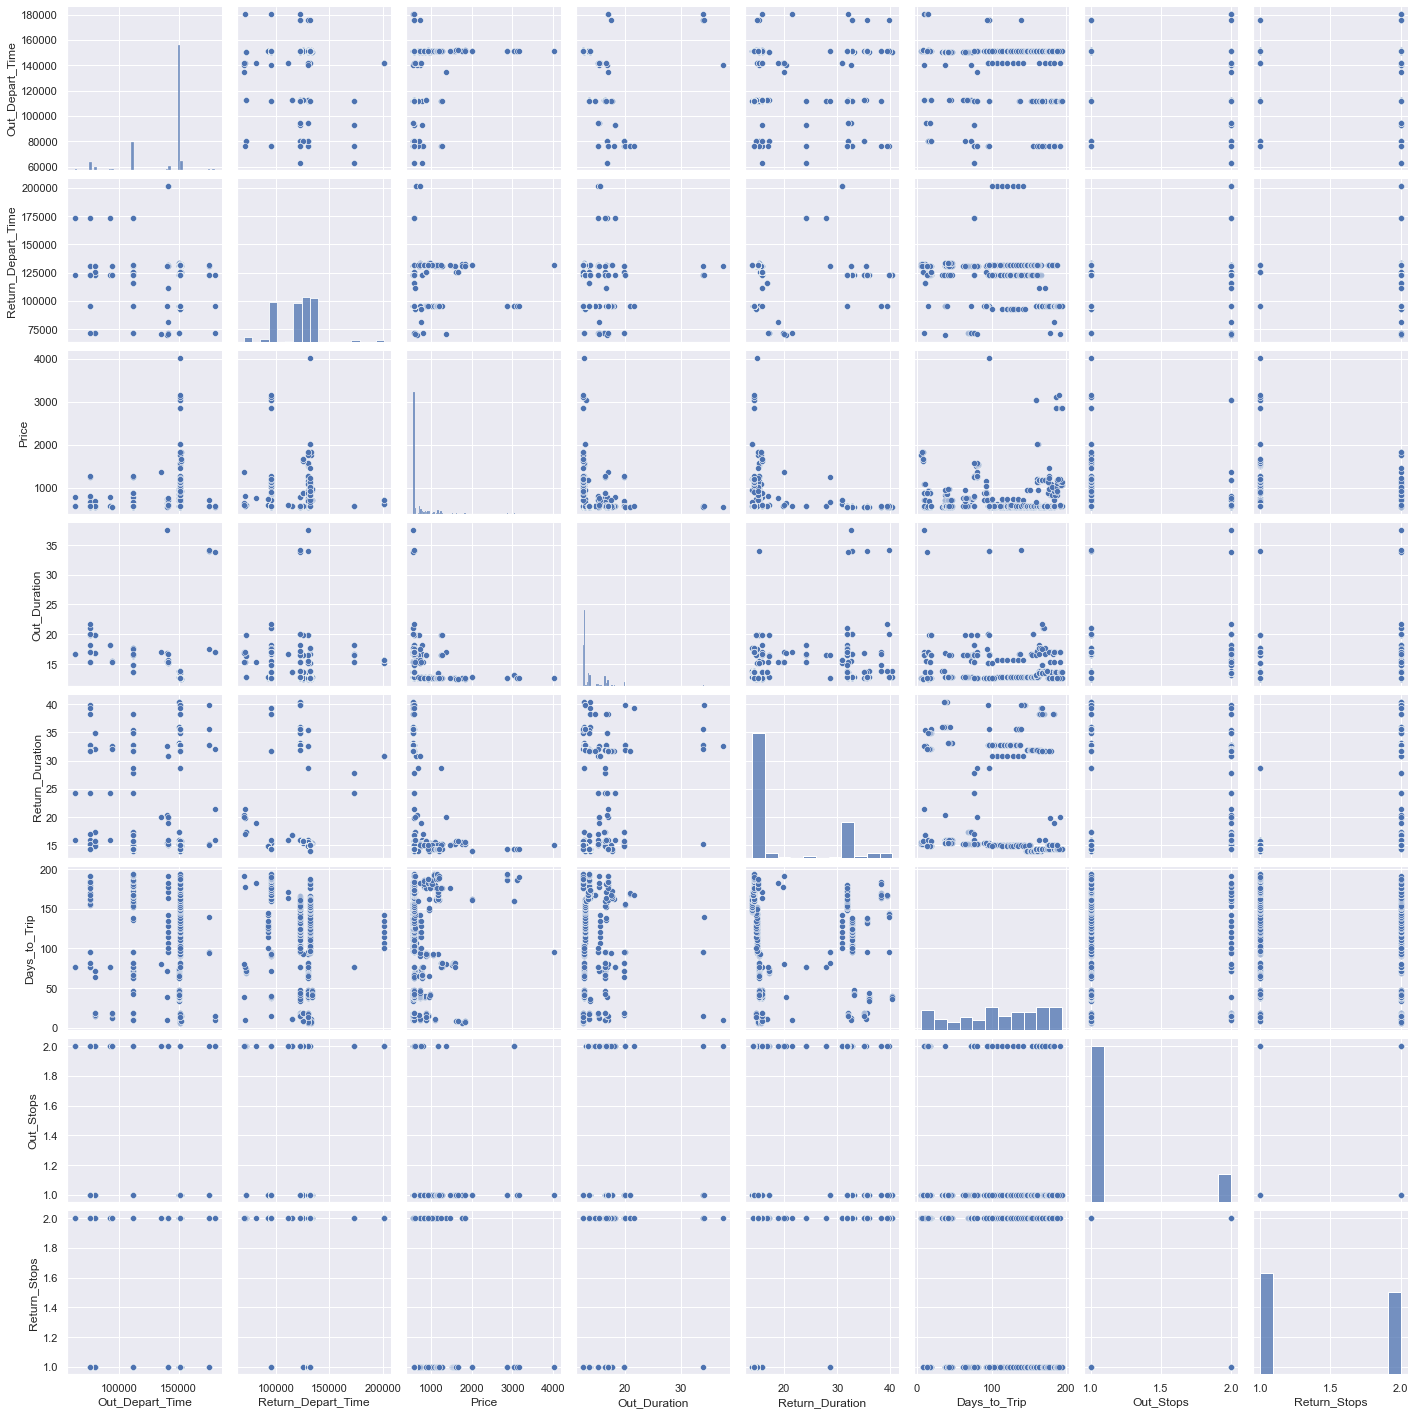

In [120]:
sns.pairplot(flights_small);

In [121]:
flights_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Out_Depart_Time     738 non-null    int64  
 1   Return_Depart_Time  738 non-null    int64  
 2   Price               738 non-null    int64  
 3   Out_Duration        738 non-null    float64
 4   Return_Duration     738 non-null    float64
 5   Days_to_Trip        738 non-null    int64  
 6   Out_Stops           738 non-null    int64  
 7   Return_Stops        738 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 51.9 KB


In [122]:
def split_and_validate(x, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(x, y, test_size=0.1, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(x.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [123]:
split_and_validate(x, y)


Validation R^2 score was: 0.0670118797436079
Feature coefficient results: 

Out_Depart_Time : 0.00
Return_Depart_Time : -0.00
Out_Duration : -7.87
Return_Duration : -11.42
Days_to_Trip : -0.11
Out_Stops : 196.24
Return_Stops : -1.78


In [125]:
X, X_test, y, y_test = train_test_split(flights_small[["Out_Depart_Time", "Return_Depart_Time","Out_Stops",
                                                       "Return_Stops",'Out_Duration', 'Return_Duration',"Days_to_Trip"]], 
                                        flights_small['Price'], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)

In [127]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [128]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train_scaled, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))


lin_reg_est.fit(X_train_scaled, y_train)

[ 0.09467571 -0.11085361  0.0494509   0.0916048  -0.09079642]
Linear Reg Mean Score:  0.006816275262361682


LinearRegression()

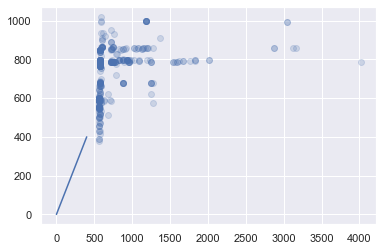

In [129]:
y_train_pred = lin_reg_est.predict(X_train_scaled)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

Lasso Model:


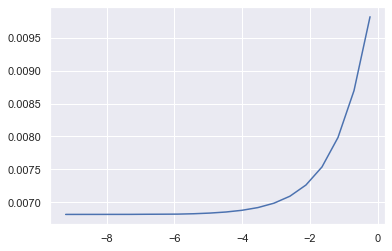

In [130]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_scaled, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score)

In [215]:
alpha = np.logspace(-4, 2, 100)
param_grid = dict(alpha=alpha)
grid = GridSearchCV(Lasso(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = kfold)
grid_result = grid.fit(X_train_scaled, y_train)


print('Best Score: ', grid_result.best_score_)
print('Best Param: ', grid_result.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [498, 488]

In [216]:
df = pd.DataFrame(grid_result.cv_results_)
plt.plot(np.log(alpha), df['mean_test_score'])

NameError: name 'grid_result' is not defined

In [217]:
lr_model_lasso = LassoCV(alphas= [0.006579332246575682], cv = kfold)
lr_model_lasso.fit(X_train, y_train)
print('Lasso Mean R Squared Score: ', lr_model_lasso.score(
    X_train, y_train))

Lasso Mean R Squared Score:  0.06010646759266158


In [218]:
from sklearn.linear_model import lars_path

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled, y_train, 
                             method='lasso')

Computing regularization path using the LARS ...


ValueError: shapes (7,498) and (488,) not aligned: 498 (dim 1) != 488 (dim 0)

In [219]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(["Out_Depart_Time","Out_Arrive_Time", "Out_Stops", "Return_Depart_Time","Return_Arrive_Time", "Return_Stops"])
plt.show()

NameError: name 'coefs' is not defined

In [ ]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(["Out_Depart_Time", "Return_Depart_Time","Out_Stops",
            "Return_Stops",'Out_Duration', 'Return_Duration',"Days_to_Trip"])
plt.show()

In [155]:
dummies = flights["Price"]

In [156]:
Out_Weekday_Dummies = pd.get_dummies(flights.Out_Weekday, drop_first = True)
pd.concat([dummies, Out_Weekday_Dummies], axis = 1)
Out_Airline_Dummies = pd.get_dummies(flights.Out_Airline, drop_first = True)
pd.concat([dummies, Out_Airline_Dummies], axis = 1)
Out_Stop_Cities_Dummies = pd.get_dummies(flights.Out_Stop_Cities, drop_first = True)
pd.concat([dummies, Out_Stop_Cities_Dummies], axis = 1)
Return_Weekday_Dummies = pd.get_dummies(flights.Return_Weekday, drop_first = True)
pd.concat([dummies, Return_Weekday_Dummies], axis = 1)
Return_Airline_Dummies = pd.get_dummies(flights.Return_Airline, drop_first = True)
pd.concat([dummies, Return_Airline_Dummies], axis = 1)
Return_Stop_Cities_Dummies = pd.get_dummies(flights.Return_Stop_Cities, drop_first = True)
pd.concat([dummies, Return_Stop_Cities_Dummies], axis = 1)

,Price,"BOS, ORD","BRU, ORD","FRA, DEN","IAD, ORD","MUC, DEN","MUC, ORD",ORD,"YUL, ORD","YYZ, DEN","YYZ, ORD"
0,594,0,0,0,0,0,1,0,0,0,0
1,594,0,0,0,0,0,1,0,0,0,0
2,594,0,0,0,0,0,1,0,0,0,0
3,594,0,0,0,0,0,1,0,0,0,0
4,594,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41,1198,0,0,0,0,0,0,1,0,0,0
42,2868,0,0,0,0,0,0,1,0,0,0
43,2868,0,0,0,0,0,0,1,0,0,0
44,3168,0,0,0,0,0,0,1,0,0,0


In [154]:
differences = {}
for i, col in enumerate(dummies.columns):
    false_mean = np.mean(dummies.y[dummies[col]==0])
    true_mean = np.mean(dummies.y[dummies[col]==1])
    
    difference_in_means = true_mean - false_mean
    differences[col] = differences_in_means
    
diffs = {k: v for k,v in sorted(differences.items(), key=lambda item:item[1])}

keys = list(diffs.keys())
vals = list(diffs.values())

sns.barplot(x = keys, y=price, ax = ax)
ax.grid
ax.tick_params(axis = 'x', rotation = 90)
ax.set_xlabel("Column Name")

AttributeError: 'Series' object has no attribute 'columns'

In [45]:
flights.corr()

,Out_Depart_Time,Out_Arrive_Time,Out_Duration,Out_Stops,Return_Depart_Time,Return_Arrive_Time,Return_Duration,Return_Stops,Price,Out_Hours,Out_Minute,Return_Hours,Return_Minute,Days_to_Trip,Return_Duration_Neg_Decay
Out_Depart_Time,1.000000,0.600535,-0.436011,-0.359923,0.091027,0.246350,-0.090653,-0.041208,0.143408,-0.453007,0.371281,-0.096093,0.129483,0.020668,0.078619
Out_Arrive_Time,0.600535,1.000000,-0.042362,-0.087737,0.182382,0.211361,0.027434,0.037345,0.058053,-0.050955,0.138968,0.017752,0.256277,-0.035577,-0.026153
Out_Duration,-0.436011,-0.042362,1.000000,0.305017,-0.012487,-0.174354,0.197624,0.125741,-0.121081,0.997855,-0.241967,0.200553,-0.049389,-0.068843,-0.190899
Out_Stops,-0.359923,-0.087737,0.305017,1.000000,0.015955,-0.188831,0.147529,0.288023,0.050172,0.332406,-0.489462,0.151340,-0.079245,-0.087152,-0.130761
Return_Depart_Time,0.091027,0.182382,-0.012487,0.015955,1.000000,0.320883,0.084011,-0.105099,-0.109632,-0.015345,0.045786,0.070829,0.355283,-0.334524,-0.070989
Return_Arrive_Time,0.246350,0.211361,-0.174354,-0.188831,0.320883,1.000000,-0.650777,-0.560229,0.122913,-0.175870,0.070203,-0.658089,0.101803,-0.297686,0.621496
Return_Duration,-0.090653,0.027434,0.197624,0.147529,0.084011,-0.650777,1.000000,0.689785,-0.266324,0.191305,0.039553,0.999282,0.155341,-0.045530,-0.997046
Return_Stops,-0.041208,0.037345,0.125741,0.288023,-0.105099,-0.560229,0.689785,1.000000,-0.127978,0.129808,-0.094705,0.698869,-0.142697,-0.054936,-0.673809
Price,0.143408,0.058053,-0.121081,0.050172,-0.109632,0.122913,-0.266324,-0.127978,1.000000,-0.100273,-0.275261,-0.256715,-0.286985,0.042912,0.260890
Out_Hours,-0.453007,-0.050955,0.997855,0.332406,-0.015345,-0.175870,0.191305,0.129808,-0.100273,1.000000,-0.304966,0.194818,-0.065471,-0.074775,-0.184004


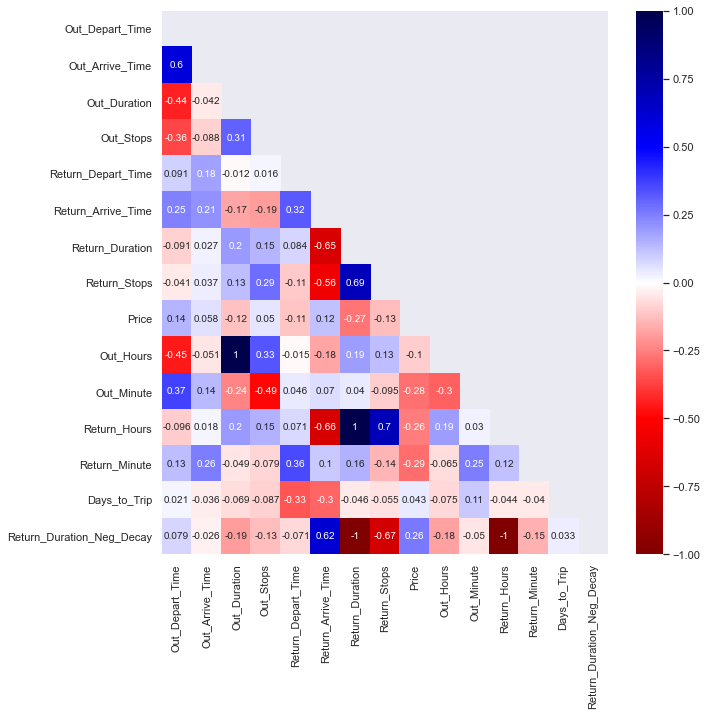

In [46]:
upper = np.triu(flights.corr()) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(flights.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

In [258]:
flights_small7 = flights_pricesdrpd.loc[:,["Price","Out_Depart_Time", "Return_Arrive_Time", 'Days_to_Trip',"Return_Duration_Neg_Decay"]]

In [259]:
flights_small7.corr()

,Price,Out_Depart_Time,Return_Arrive_Time,Days_to_Trip,Return_Duration_Neg_Decay
Price,1.000000,0.146229,0.239094,-0.114384,0.312670
Out_Depart_Time,0.146229,1.000000,0.249488,0.010353,0.072728
Return_Arrive_Time,0.239094,0.249488,1.000000,-0.295775,0.628307
Days_to_Trip,-0.114384,0.010353,-0.295775,1.000000,0.019303
Return_Duration_Neg_Decay,0.312670,0.072728,0.628307,0.019303,1.000000


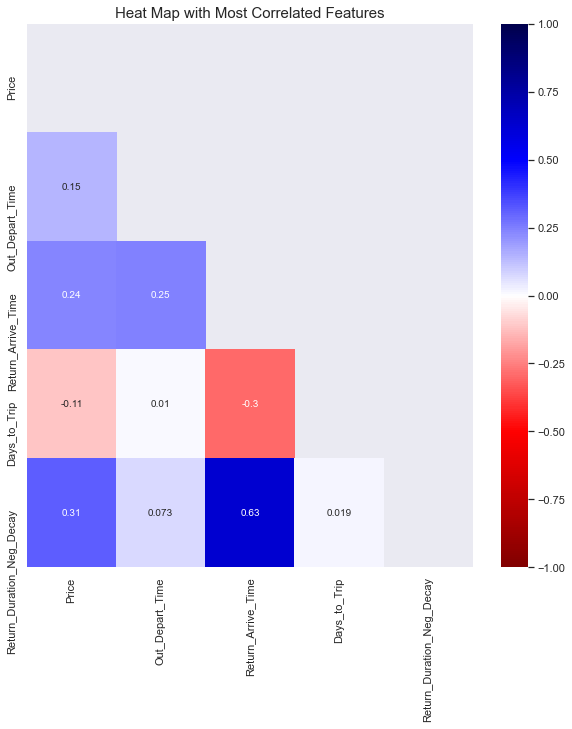

In [293]:
upper = np.triu(flights_small7.corr()) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(flights_small7.corr(),cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)
plt.title("Heat Map with Most Correlated Features", size = 15)
plt.savefig('Heat Map with Most Correlated Features.jpg', transparent=True, bbox_inches='tight');

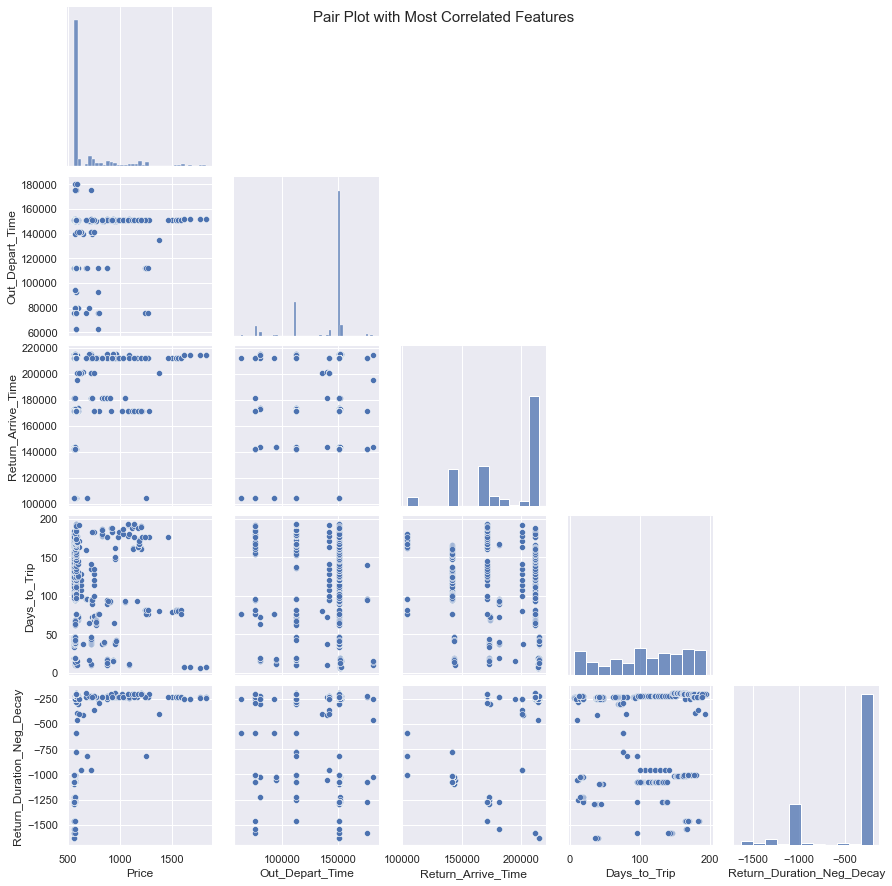

In [301]:
pair = sns.pairplot(flights_small7, corner = True)
pair.fig.suptitle('Pair Plot with Most Correlated Features', size = 15)
#plt.title("Pair Plot with Most Correlated Features", size = 10)
plt.savefig('Pair Plot with Most Correlated Features.jpg', transparent=True, bbox_inches='tight');

In [189]:
flights_small = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Arrive_Time", "Price", 'Days_to_Trip']]

In [48]:
flights_small2 = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Duration_Neg_Decay", "Price", 'Days_to_Trip']]

In [49]:
flights_small3 = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Arrive_Time", "Price"]]

In [50]:
flights_small4 = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Duration_Neg_Decay", "Price"]]

In [51]:
flights_small5 = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Arrive_Time", "Price", "Return_Stops"]]

In [52]:
flights_small6 = flights_pricesdrpd.loc[:,["Out_Depart_Time", "Return_Duration_Neg_Decay", "Price", "Return_Stops"]]

Flights Small 1 Data
Linear Regression Scores:  [0.04813267 0.01563069 0.07670083 0.06177722 0.03327136]
Linear Reg Mean Score:  0.047102552466751504
VALIDATE Scores:  [ 0.0295706  -0.02344303  0.17729532  0.10508858  0.09073107]
VALIDATE Mean Score:  0.07584850805766466
LinearRegression()
Train with Squared poly scores w/ K fold [ 0.13751772  0.03472273  0.20158309  0.16235902 -0.02103972]
Train with Squared poly scores mean:  0.1030285675529814
Val with Squared poly scores w/ k fold [-0.06344115  0.10488227  0.15859091  0.16641076  0.28957012]
Val with Squared poly scores mean 0.13120258042632787
std.dev 0.08304363550063822
variance 0.006896245397162859
Train with third power poly scores w/ K fold [0.21449145 0.08466294 0.25748904 0.2113663  0.0486185 ]
Train with third power poly scores mean:  0.16332564609555558
Val with third power poly scores w/ k fold [0.08522796 0.15945197 0.08530254 0.12480484 0.31365805]
Val with third power poly scores mean 0.15368907177311797
std.dev 0.0814

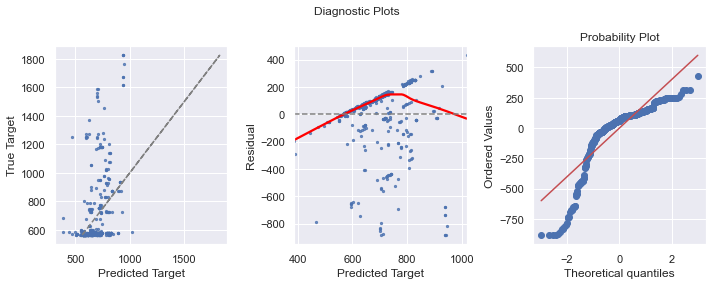

In [202]:
print("Flights Small 1 Data")

X, X_test, y, y_test = train_test_split(flights_small[["Out_Depart_Time", "Return_Arrive_Time", 'Days_to_Trip']], 
                                        flights_small['Price'], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val, y_val, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train, y_train))

poly = PolynomialFeatures(degree=2)
X_train_poly1a = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly1a = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly1a = LinearRegression()
lr_poly1a.fit(X_train_poly1a,y_train)

scores1a = cross_val_score(lr_poly1a, X_train_poly1a, y_train, cv=kfold)
validatescores1a = cross_val_score(lr_poly1a, X_val_poly1a, y_val, cv=kfold )

print("Train with Squared poly scores w/ K fold", scores1a)
print("Train with Squared poly scores mean: ", np.mean(scores1a))
print("Val with Squared poly scores w/ k fold", validatescores1a)
print("Val with Squared poly scores mean", np.mean(validatescores1a))
print("std.dev", np.std(scores1a))
print("variance", np.var(scores1a))


poly2 = PolynomialFeatures(degree=3)
X_train_poly2a = poly2.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly2a = poly2.transform(X_val)

# Fit a model using polynomial features
lr_poly2a = LinearRegression()
lr_poly2a.fit(X_train_poly2a,y_train)

scores2a = cross_val_score(lr_poly2a, X_train_poly2a, y_train, cv=kfold)
validatescores2a = cross_val_score(lr_poly2a, X_val_poly2a, y_val, cv=kfold )

print("Train with third power poly scores w/ K fold", scores2a)
print("Train with third power poly scores mean: ", np.mean(scores2a))
print("Val with third power poly scores w/ k fold", validatescores2a)
print("Val with third power poly scores mean", np.mean(validatescores2a))
print("std.dev", np.std(scores2a))
print("variance", np.var(scores2a))

print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1a.predict(X_train_poly1a), y_train)

# Apply polynomial transformation to TEST set
X_testcubed = poly2.transform(X_test)
print("TEST with third power poly", lr_poly2a.score(X_testcubed,y_test))

Diagnostic plots for squared VALIDATE


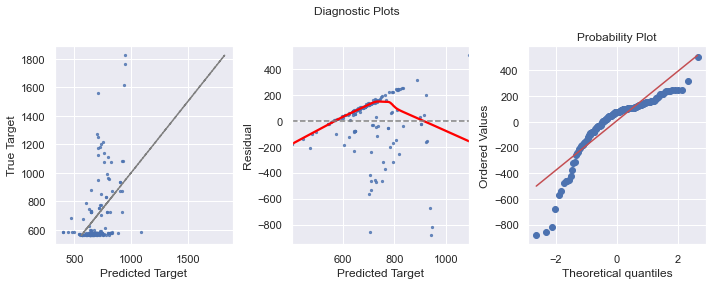

In [56]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1a.predict(X_val_poly1a), y_val)

Diagnostic plots for third power TRAIN


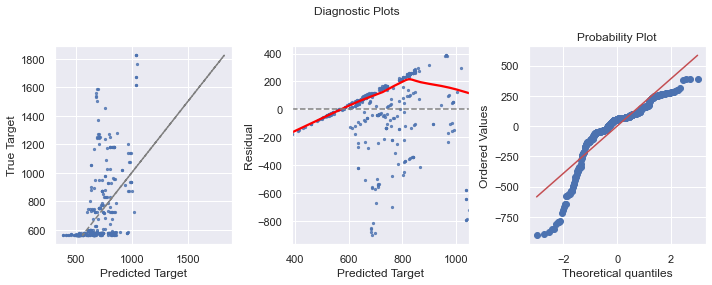

In [298]:
sns.color_palette("flare", as_cmap=True)
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2a.predict(X_train_poly2a), y_train)
plt.savefig('Diagnostic plots for third power TRAIN DATA.jpg');

Diagnostic plots for third power Validate


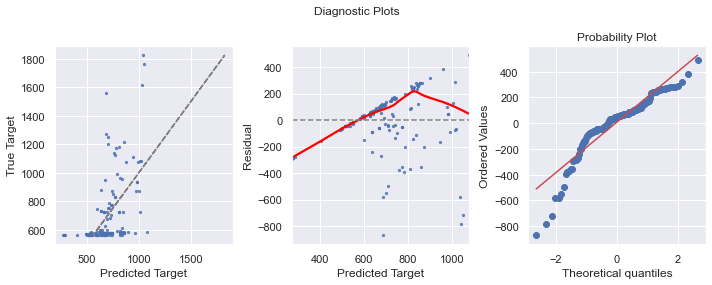

In [297]:
print("Diagnostic plots for third power Validate")
diagnostic_plots(lr_poly2a.predict(X_val_poly2a), y_val)
plt.savefig('Diagnostic plots for third power VALIDATION DATA.jpg');

Flights Small 2 Data
Linear Regression Scores:  [0.11379767 0.09415801 0.11297697 0.12960709 0.07451601]
Linear Reg Mean Score:  0.10501115070490086
VALIDATE Scores:  [0.14006689 0.0411125  0.23198331 0.15308028 0.18632402]
VALIDATE Mean Score:  0.15051340132699048
LinearRegression()
Train with squared poly scores w/ K fold [0.21297741 0.11565692 0.22690437 0.240784   0.00895434]
Train with squared poly scores mean:  0.16105540940783103
Val with squared poly scores w/ k fold [0.12510563 0.13671456 0.33220953 0.20707071 0.34964476]
Val with squared poly scores mean 0.23014903972720716
std.dev 0.0878457611639096
variance 0.0077168777544666485
Train with third power poly scores w/ K fold [0.30050469 0.10017063 0.27410445 0.27040562 0.13515906]
Train with third power poly scores mean:  0.21606888848052472
Val with third power poly scores w/ k fold [ 0.1132379  -0.0156381   0.39305732  0.27553093  0.27402966]
Val with third power poly scores mean 0.20804354498553948
std.dev 0.08176651902804

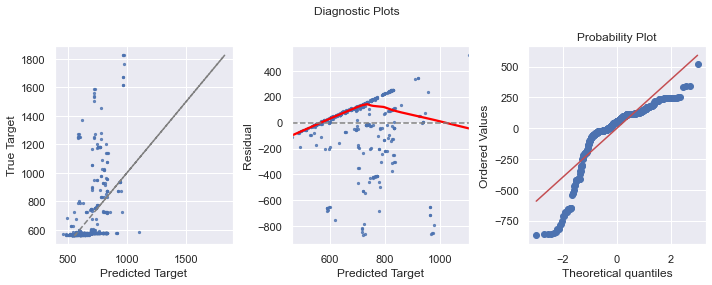

In [251]:
print("Flights Small 2 Data")

X2, X_test2, y2, y_test2 = train_test_split(flights_small2[["Out_Depart_Time", "Return_Duration_Neg_Decay", 
                                                            'Days_to_Trip']], 
                                        flights_small2['Price'], test_size=0.1, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train2, y_train2, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val2, y_val2, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train2, y_train2))

poly = PolynomialFeatures(degree=2)
X_train_poly1b = poly.fit_transform(X_train2)

# Apply polynomial transformation to val set
X_val_poly1b = poly.transform(X_val2)

# Fit a model using polynomial features
lr_poly1b = LinearRegression()
lr_poly1b.fit(X_train_poly1b,y_train2)
scores1b = cross_val_score(lr_poly1b, X_train_poly1b, y_train2, cv=kfold)
validatescores1b = cross_val_score(lr_poly1b, X_val_poly1b, y_val2, cv=kfold )

print("Train with squared poly scores w/ K fold", scores1b)
print("Train with squared poly scores mean: ", np.mean(scores1b))
print("Val with squared poly scores w/ k fold", validatescores1b)
print("Val with squared poly scores mean", np.mean(validatescores1b))
print("std.dev", np.std(scores1b))
print("variance", np.var(scores1b))


poly2 = PolynomialFeatures(degree=3)
X_train_poly2b = poly2.fit_transform(X_train2)

# Apply polynomial transformation to val set
X_val_poly2b = poly2.transform(X_val2)

# Fit a model using polynomial features
lr_poly2b = LinearRegression()
lr_poly2bfit=lr_poly2b.fit(X_train_poly2b,y_train2)


scores2b = cross_val_score(lr_poly2b, X_train_poly2b, y_train2, cv=kfold)
validatescores2b = cross_val_score(lr_poly2b, X_val_poly2b, y_val2, cv=kfold )

print("Train with third power poly scores w/ K fold", scores2b)
print("Train with third power poly scores mean: ", np.mean(scores2b))
print("Val with third power poly scores w/ k fold", validatescores2b)
print("Val with third power poly scores mean", np.mean(validatescores2b))
print("std.dev", np.std(scores2b))
print("variance", np.var(scores2b))

print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1b.predict(X_train_poly1b), y_train2)

# Apply polynomial transformation to TEST set
X_testcubed1 = poly2.transform(X_test2)
print("TEST with third power poly", lr_poly2b.score(X_testcubed1,y_test))

In [243]:
print(lr_poly2b.coef_)

[ 0.00000000e+00  2.31010965e-02  7.81727892e-01  4.44295530e+01
 -2.95690386e-08 -1.49453084e-05 -5.08150157e-04 -3.72654675e-04
 -3.44727754e-03 -1.61001017e-01 -9.63726368e-14  6.42357146e-11
  1.07404745e-09 -5.58757178e-10 -2.83371276e-09  1.17345506e-06
 -1.33589189e-07  9.50610867e-07  2.25847631e-05  1.10761406e-04]


In [244]:
print(lr_poly2b.intercept_)

-1354.4427130277013


In [247]:
poly2.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [ ]:
sns.regplot(data=df, x='points', y='assists').set(title='Points vs. Assists')


return negative decay and the days to trip have the most impact on the model

In [257]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green', linewidth=3)
    ax.scatter(X, y, s=20)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label, linewidth=3)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

TypeError: 'LinearRegression' object is not callable

ValueError: x and y must be the same size

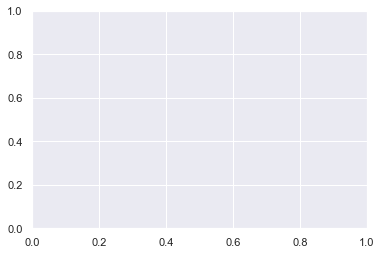

In [255]:
plt.scatter(X_train2,y_train2, color="red")
plt.plot(X_train2, lr_poly2bfit.predict(poly2.fit_transform(X_train2)))
plt.title("Poly Regression - Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [235]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly2b)

X_val_poly_scaled = scaler.transform(X_val_poly2b)

print("\t\tTrain\tTest")

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 2]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly_scaled,y_train)
    print(f"alpha={alpha}: \t{lasso.score(X_train_poly_scaled,y_train):.1f} \t{lasso.score(X_val_poly_scaled,y_val):.1f}")

		Train	Test
alpha=0.0001: 	0.2 	0.3
alpha=0.001: 	0.2 	0.3
alpha=0.01: 	0.2 	0.3
alpha=0.1: 	0.2 	0.3
alpha=1: 	0.2 	0.3
alpha=2: 	0.2 	0.3


/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11218101.64687732, tolerance: 2962.7692721311478
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11179042.67193648, tolerance: 2962.7692721311478
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10794588.558892105, tolerance: 2962.7692721311478
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/py

Ridge Model:


/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44811e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35313e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6757e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32825e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27108e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9446e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86916e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12539e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

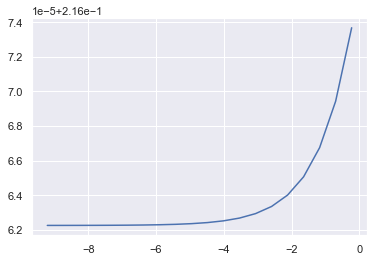

In [236]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_poly2b, y_train2)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

Elastic Net Grid Search


/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9439038.061086956, tolerance: 2466.0827907692305
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8656255.340433521, tolerance: 2367.745183589744
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8606025.007889062, tolerance: 2227.18057974359
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python

/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8656655.713965517, tolerance: 2367.745183589744
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8606837.039517, tolerance: 2227.18057974359
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9489040.862805428, tolerance: 2469.7960879795396
  model = cd_fast.enet_coordinate_descent(
/Users/emilyubbelohde/opt/anaconda3/lib/python3.8

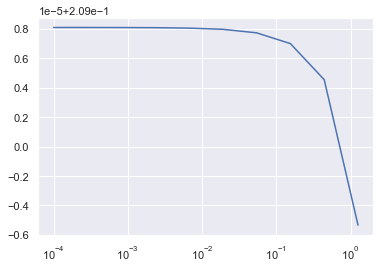

In [234]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train_poly2b, y_train2, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [182]:
poly2.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [180]:
lr_poly2b.coef_

array([ 0.00000000e+00,  2.31010965e-02,  7.81727892e-01,  4.44295530e+01,
       -2.95690386e-08, -1.49453084e-05, -5.08150157e-04, -3.72654675e-04,
       -3.44727754e-03, -1.61001017e-01, -9.63726368e-14,  6.42357146e-11,
        1.07404745e-09, -5.58757178e-10, -2.83371276e-09,  1.17345506e-06,
       -1.33589189e-07,  9.50610867e-07,  2.25847631e-05,  1.10761406e-04])

Diagnostic plots for squared VALIDATE


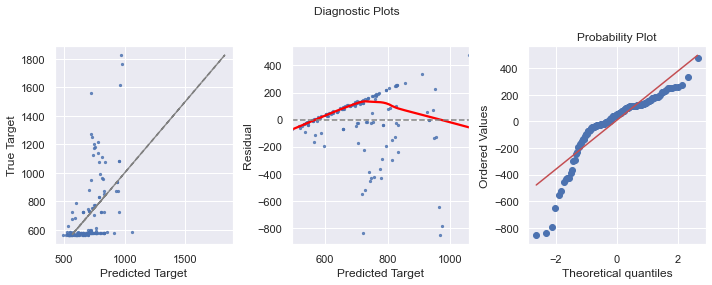

In [60]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1b.predict(X_val_poly1b), y_val2)

Diagnostic plots for third power TRAIN


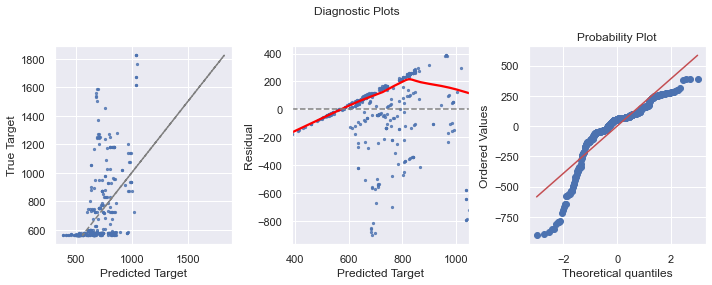

In [61]:
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2a.predict(X_train_poly2a), y_train2)

Diagnostic plots for third power VALIDATE


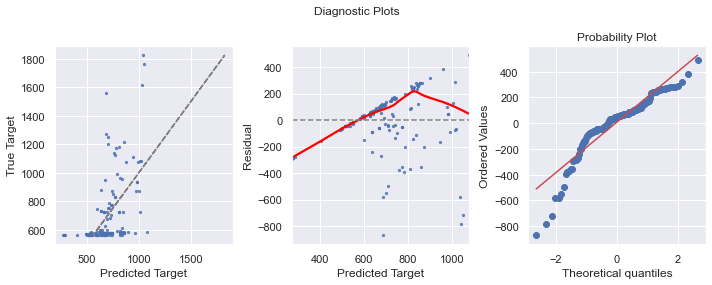

In [62]:
print("Diagnostic plots for third power VALIDATE")
diagnostic_plots(lr_poly2a.predict(X_val_poly2a), y_val2)

Flights Small 3 Data
Linear Regression Scores:  [0.04539008 0.00366989 0.07077353 0.07188831 0.03001415]
Linear Reg Mean Score:  0.044347191347022544
VALIDATE Scores:  [0.04934663 0.04709508 0.14327107 0.07898544 0.05949406]
VALIDATE Mean Score:  0.07563845711728964
LinearRegression()
Train with squared poly scores w/ K fold [0.04433203 0.00508699 0.06766212 0.07313746 0.02127738]
Train with squared poly scores mean:  0.04229919676155673
Val with squared poly scores w/ k fold [0.02973426 0.02713859 0.10780904 0.09175165 0.08082513]
Val with squared poly scores mean 0.06745173520173502
std.dev 0.026172787306047492
variance 0.0006850147953676007
Train with third power poly scores w/ K fold [0.05928751 0.02725736 0.06339607 0.06235168 0.05309331]
Train with third power poly scores mean:  0.05307718652650097
Val with third power poly scores w/ k fold [ 0.05324389  0.03148466 -0.09597375  0.09258232  0.09707025]
Val with third power poly scores mean 0.03568147276424134
std.dev 0.01339946077

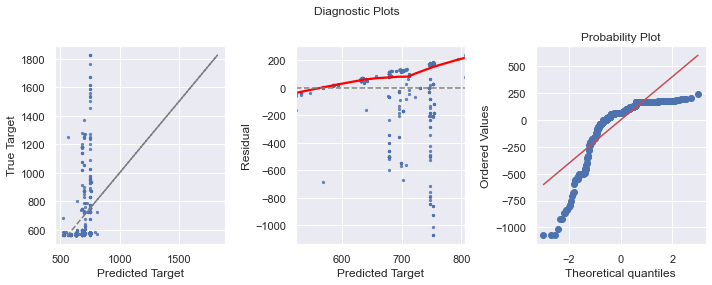

In [205]:
print("Flights Small 3 Data")

X3, X_test3, y3, y_test3 = train_test_split(flights_small3[["Out_Depart_Time", "Return_Arrive_Time"]], 
                                        flights_small3['Price'], test_size=0.1, random_state=42)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train3, y_train3, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val3, y_val3, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train3, y_train3))

poly = PolynomialFeatures(degree=2)
X_train_poly1c = poly.fit_transform(X_train3)

# Apply polynomial transformation to val set
X_val_poly1c = poly.transform(X_val3)

# Fit a model using polynomial features
lr_poly1c = LinearRegression()
lr_poly1c.fit(X_train_poly1c,y_train3)

scores1c = cross_val_score(lr_poly1c, X_train_poly1c, y_train2, cv=kfold)
validatescores1c = cross_val_score(lr_poly1c, X_val_poly1c, y_val2, cv=kfold )

print("Train with squared poly scores w/ K fold", scores1c)
print("Train with squared poly scores mean: ", np.mean(scores1c))
print("Val with squared poly scores w/ k fold", validatescores1c)
print("Val with squared poly scores mean", np.mean(validatescores1c))
print("std.dev", np.std(scores1c))
print("variance", np.var(scores1c))




poly2 = PolynomialFeatures(degree=3)
X_train_poly2c = poly2.fit_transform(X_train3)

# Apply polynomial transformation to val set
X_val_poly2c = poly2.transform(X_val3)

# Fit a model using polynomial features
lr_poly2c = LinearRegression()
lr_poly2c.fit(X_train_poly2c,y_train3)


scores2c = cross_val_score(lr_poly2c, X_train_poly2c, y_train2, cv=kfold)
validatescores2c = cross_val_score(lr_poly2c, X_val_poly2c, y_val2, cv=kfold )

print("Train with third power poly scores w/ K fold", scores2c)
print("Train with third power poly scores mean: ", np.mean(scores2c))
print("Val with third power poly scores w/ k fold", validatescores2c)
print("Val with third power poly scores mean", np.mean(validatescores2c))
print("std.dev", np.std(scores2c))
print("variance", np.var(scores2c))



print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1c.predict(X_train_poly1c), y_train3)

Diagnostic plots for squared VALIDATE


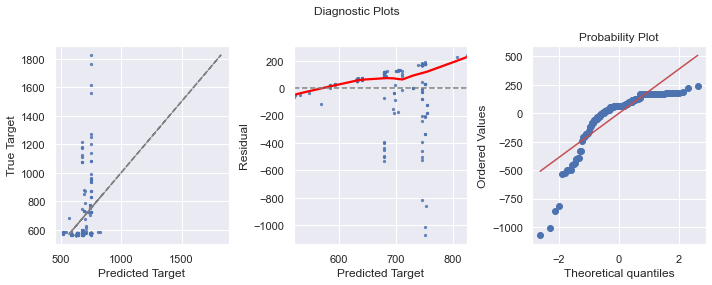

In [64]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1c.predict(X_val_poly1c), y_val3)

Diagnostic plots for third power TRAIN


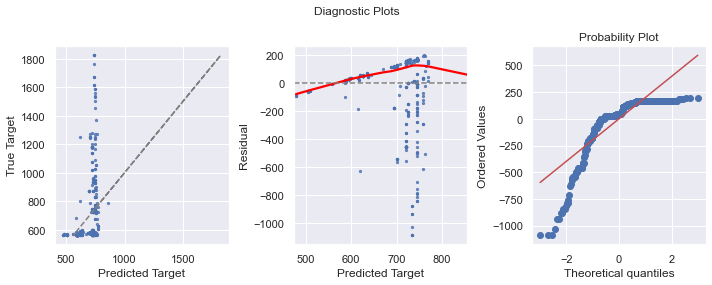

In [65]:
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2c.predict(X_train_poly2c), y_train3)

Diagnostic plots for third power VALIDATE


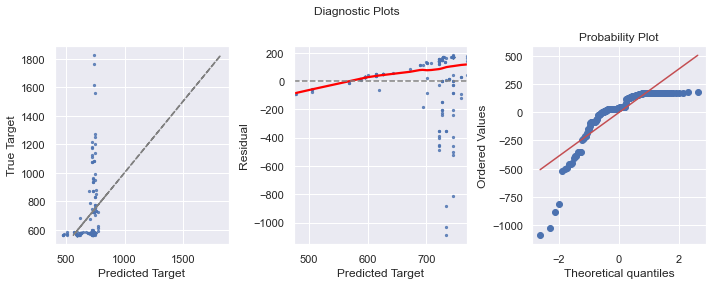

In [66]:
print("Diagnostic plots for third power VALIDATE")
diagnostic_plots(lr_poly2c.predict(X_val_poly2c), y_val3)

Flights Small 4 Data
Linear Regression Scores:  [0.09704356 0.06640591 0.09124047 0.12779998 0.06498823]
Linear Reg Mean Score:  0.08949563257527389
VALIDATE Scores:  [0.11410897 0.13596924 0.15984705 0.09540415 0.1255879 ]
VALIDATE Mean Score:  0.12618346152011672
LinearRegression()
Train with Squared poly 0.10363617991837448
Val with Squared poly 0.14908555331874185
Train with third power poly 0.11302928897931319
Val with third power poly 0.1432580626047225
Diagnostic plots for squared TRAIN


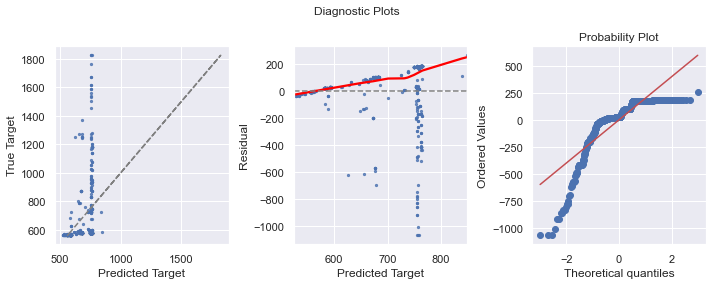

In [67]:
print("Flights Small 4 Data")

X4, X_test4, y4, y_test4 = train_test_split(flights_small4[["Out_Depart_Time", "Return_Duration_Neg_Decay"]], 
                                        flights_small4['Price'], test_size=0.1, random_state=42)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X4, y4, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train4, y_train4, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val4, y_val4, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train4, y_train4))

poly = PolynomialFeatures(degree=2)
X_train_poly1d = poly.fit_transform(X_train4)

# Apply polynomial transformation to val set
X_val_poly1d = poly.transform(X_val4)

# Fit a model using polynomial features
lr_poly1d = LinearRegression()
lr_poly1d.fit(X_train_poly1d,y_train4)
print("Train with Squared poly", lr_poly1d.score(X_train_poly1d,y_train4))
print("Val with Squared poly", lr_poly1d.score(X_val_poly1d,y_val4))


poly2 = PolynomialFeatures(degree=3)
X_train_poly2d = poly2.fit_transform(X_train4)

# Apply polynomial transformation to val set
X_val_poly2d = poly2.transform(X_val4)

# Fit a model using polynomial features
lr_poly2d = LinearRegression()
lr_poly2d.fit(X_train_poly2d,y_train4)
print("Train with third power poly", lr_poly2d.score(X_train_poly2d,y_train4))
print("Val with third power poly", lr_poly2d.score(X_val_poly2d,y_val4))
print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1d.predict(X_train_poly1d), y_train4)

Diagnostic plots for squared VALIDATE


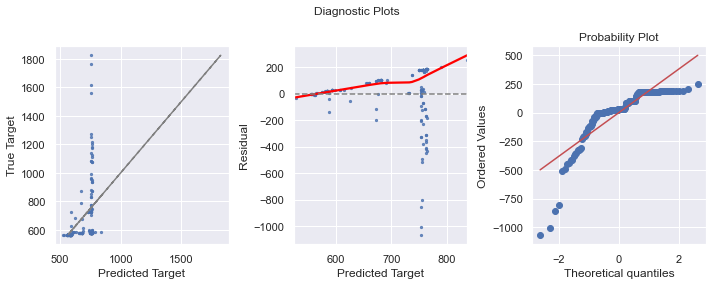

In [68]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1d.predict(X_val_poly1d), y_val4)

Diagnostic plots for third power TRAIN


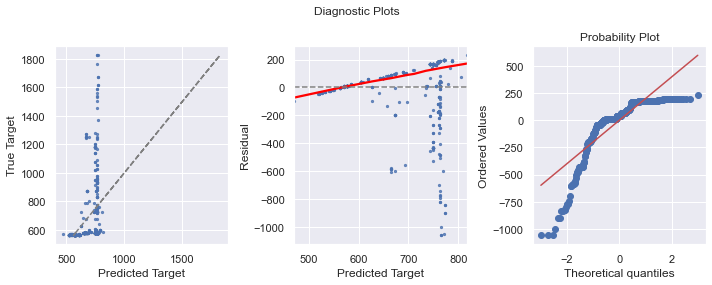

In [69]:
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2d.predict(X_train_poly2d), y_train4)

Diagnostic plots for third power VALIDATE


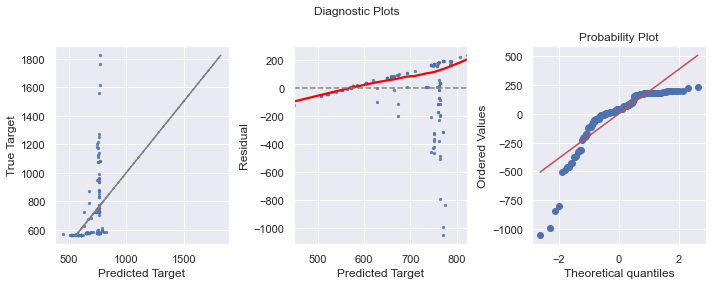

In [70]:
print("Diagnostic plots for third power VALIDATE")
diagnostic_plots(lr_poly2d.predict(X_val_poly2d), y_val4)

Flights Small 5 Data
Linear Regression Scores:  [0.083073   0.00614972 0.06737129 0.07655662 0.05302775]
Linear Reg Mean Score:  0.05723567617038712
VALIDATE Scores:  [ 0.07622135 -0.08489844  0.16504321  0.09710309  0.06844099]
VALIDATE Mean Score:  0.06438204017128449
LinearRegression()
Train with Squared poly 0.11786390340119812
Val with Squared poly 0.1632380953650956
Train with third power poly 0.1523075505642002
Val with third power poly 0.13779528604374225
Diagnostic plots for squared TRAIN


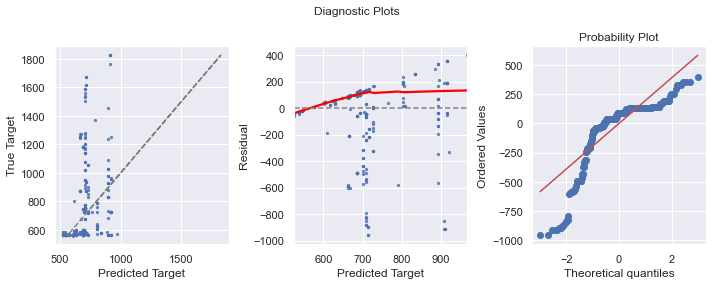

In [71]:
print("Flights Small 5 Data")

X5, X_test5, y5, y_test5 = train_test_split(flights_small5[["Out_Depart_Time", "Return_Arrive_Time", "Return_Stops"]], 
                                        flights_small5['Price'], test_size=0.1, random_state=42)
X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y5, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train5, y_train5, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val5, y_val5, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train5, y_train5))

poly = PolynomialFeatures(degree=2)
X_train_poly1e = poly.fit_transform(X_train5)

# Apply polynomial transformation to val set
X_val_poly1e = poly.transform(X_val5)

# Fit a model using polynomial features
lr_poly1e = LinearRegression()
lr_poly1e.fit(X_train_poly1e,y_train5)
print("Train with Squared poly", lr_poly1e.score(X_train_poly1e,y_train5))
print("Val with Squared poly", lr_poly1e.score(X_val_poly1e,y_val5))


poly2 = PolynomialFeatures(degree=3)
X_train_poly2e = poly2.fit_transform(X_train5)

# Apply polynomial transformation to val set
X_val_poly2e = poly2.transform(X_val5)

# Fit a model using polynomial features
lr_poly2e = LinearRegression()
lr_poly2e.fit(X_train_poly2e,y_train5)
print("Train with third power poly", lr_poly2e.score(X_train_poly2e,y_train5))
print("Val with third power poly", lr_poly2e.score(X_val_poly2e,y_val5))
print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1e.predict(X_train_poly1e), y_train5)

Diagnostic plots for squared VALIDATE


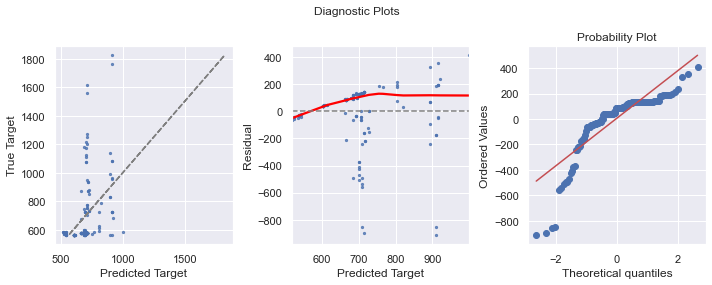

In [72]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1e.predict(X_val_poly1e), y_val5)

Diagnostic plots for third power TRAIN


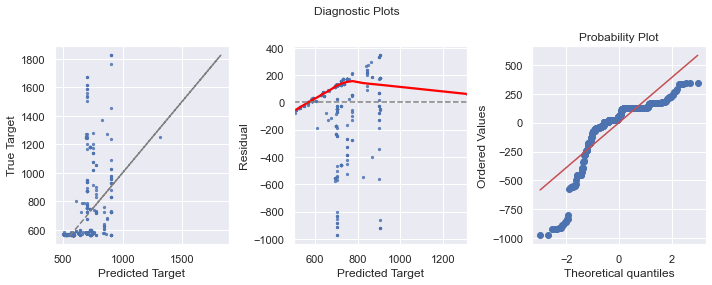

In [73]:
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2e.predict(X_train_poly2e), y_train5)

Diagnostic plots for third power VALIDATE


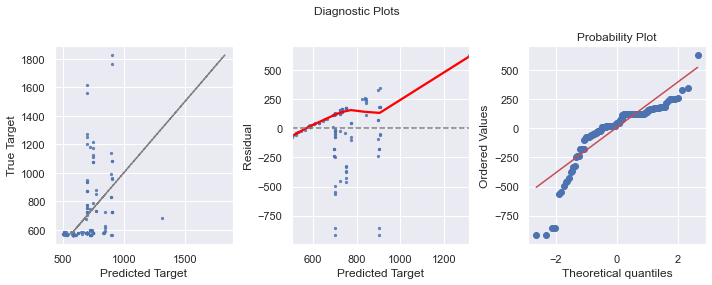

In [74]:
print("Diagnostic plots for third power VALIDATE")
diagnostic_plots(lr_poly2e.predict(X_val_poly2e), y_val5)

Flights Small 6 Data
Linear Regression Scores:  [0.20349286 0.11674286 0.10186973 0.1718959  0.11393372]
Linear Reg Mean Score:  0.14158701453187117
VALIDATE Scores:  [ 0.23444049 -0.00076469  0.23783741  0.17523892  0.18200665]
VALIDATE Mean Score:  0.1657517565821892
LinearRegression()
Train with third power poly scores [0.24679852 0.20628783 0.12291396 0.21997499 0.07673943]
Train with third power poly scores mean:  0.1745429467784512
Val with third power poly scores [ 0.28438776  0.01257056 -0.88013916  0.16617675  0.21340405]
Val with third power poly scores mean -0.04072000971607377
Train with third power poly scores [0.25212129 0.20617678 0.14213537 0.22507366 0.14331555]
Train with third power poly scores mean:  0.19376452911174744
Val with third power poly scores [ 3.11927493e-01 -2.21199126e-03 -2.63851084e+00  1.04150249e-01
  2.00120447e-01]
Val with third power poly scores mean 0.1657517565821892
Diagnostic plots for squared TRAIN


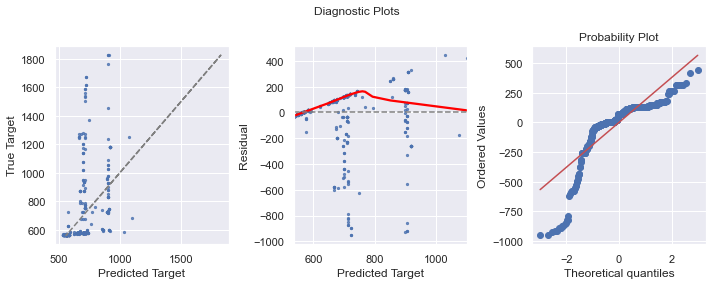

In [206]:
print("Flights Small 6 Data")

X6, X_test6, y6, y_test6 = train_test_split(flights_small6[["Out_Depart_Time", "Return_Stops","Return_Duration_Neg_Decay"]], 
                                        flights_small6['Price'], test_size=0.1, random_state=42)
X_train6, X_val6, y_train6, y_val6 = train_test_split(X6, y6, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train6, y_train6, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val6, y_val6, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train6, y_train6))

poly = PolynomialFeatures(degree=2)
X_train_poly1e = poly.fit_transform(X_train6)

# Apply polynomial transformation to val set
X_val_poly1e = poly.transform(X_val6)

# Fit a model using polynomial features
lr_poly1e = LinearRegression()
lr_poly1e.fit(X_train_poly1e,y_train6) 

scores1e = cross_val_score(lr_poly1e, X_train_poly1e, y_train6, cv=kfold)
validatescores1e = cross_val_score(lr_poly1e, X_val_poly1e, y_val6, cv=kfold )
print("Train with third power poly scores", scores1e)
print("Train with third power poly scores mean: ", np.mean(scores1e))
print("Val with third power poly scores", validatescores1e)
print("Val with third power poly scores mean", np.mean(validatescores1e))

poly2 = PolynomialFeatures(degree=3)
X_train_poly2e = poly2.fit_transform(X_train6)

# Apply polynomial transformation to val set
X_val_poly2e = poly2.transform(X_val6)

# Fit a model using polynomial features
lr_poly2e = LinearRegression()
lr_poly2e.fit(X_train_poly2e,y_train6)
scores2e = cross_val_score(lr_poly2e, X_train_poly2e, y_train6, cv=kfold)
validatescores2e = cross_val_score(lr_poly2e, X_val_poly2e, y_val6, cv=kfold )
print("Train with third power poly scores", scores2e)
print("Train with third power poly scores mean: ", np.mean(scores2e))
print("Val with third power poly scores", validatescores2e)
print("Val with third power poly scores mean", np.mean(validatescores))

print("Diagnostic plots for squared TRAIN")
diagnostic_plots(lr_poly1e.predict(X_train_poly1e), y_train6)

Diagnostic plots for squared VALIDATE


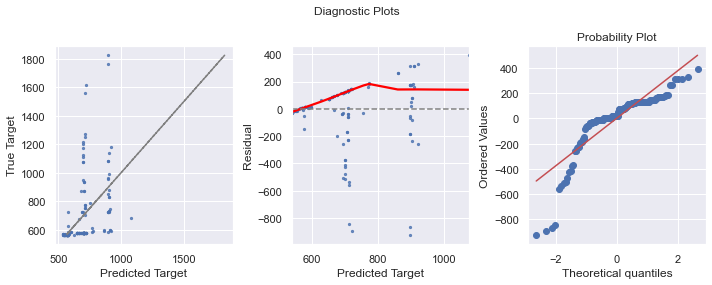

In [76]:
print("Diagnostic plots for squared VALIDATE")
diagnostic_plots(lr_poly1e.predict(X_val_poly1e), y_val6)

Diagnostic plots for third power TRAIN


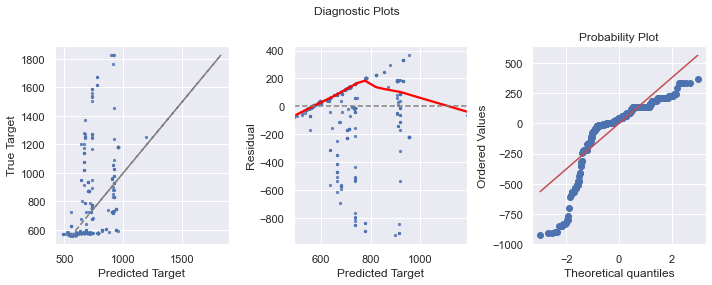

In [77]:
print("Diagnostic plots for third power TRAIN")
diagnostic_plots(lr_poly2e.predict(X_train_poly2e), y_train6)

Diagnostic plots for third power VALIDATE


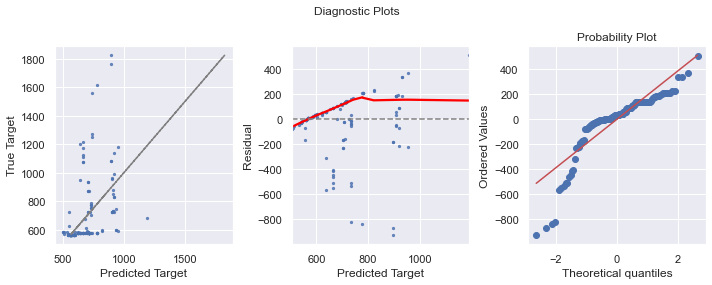

In [78]:
print("Diagnostic plots for third power VALIDATE")
diagnostic_plots(lr_poly2e.predict(X_val_poly2e), y_val6)

Looking at lasso models to see if they imrove on the model at all 

In [79]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

0.039412737885022975

In [158]:
flights_small7 = flights_small6.copy()
flights_small7["Dept**2"] = flights_small7["Out_Depart_Time"] **2
X7, X_test7, y7, y_test7 = train_test_split(flights_small7[["Dept**2", "Return_Stops","Return_Duration_Neg_Decay"]], 
                                        flights_small7['Price'], test_size=0.1, random_state=42)
X_train7, X_val7, y_train7, y_val7 = train_test_split(X7, y7, test_size=0.25, random_state=40)

lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train7, y_train7, cv=kfold)
validatescores = cross_val_score(lin_reg_est, X_val7, y_val7, cv=kfold)
print("Linear Regression Scores: ", scores)
print("Linear Reg Mean Score: ", np.mean(scores))
print("VALIDATE Scores: ", validatescores)
print("VALIDATE Mean Score: ", np.mean(validatescores))
print(lin_reg_est.fit(X_train7, y_train7))


Linear Regression Scores:  [0.16979533 0.1192935  0.09518124 0.12817778 0.09446348]
Linear Reg Mean Score:  0.12138226682765227
VALIDATE Scores:  [ 0.22363551 -0.0095203   0.21075397  0.13852793  0.15483966]
VALIDATE Mean Score:  0.1436473542333277
LinearRegression()


In [ ]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)

print("\t\tTrain\tTest")

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 2]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly_scaled,y_train)
    print(f"alpha={alpha}: \t{lasso.score(X_train_poly_scaled,y_train):.1f} \t{lasso.score(X_val_poly_scaled,y_val):.1f}")

In [ ]:
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

In [ ]:
diagnostic_plots(lr_poly.predict(X_train_poly), y_train)

In [ ]:
diagnostic_plots(lr_poly2.predict(X_train_poly2), y_train)

In [ ]:
grid_est.best_estimator_

In [ ]:
params['alpha']

In [ ]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [ ]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

In [ ]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [ ]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

In [ ]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

In [ ]:
lr.score(X_val,y_val)

In [ ]:
X = X_train
X = sm.add_constant(X)  # We want our model to include a constant value (modeled by the y-intercept)

# Pick the target
y = y_train

# Fit model with target as housing price index
lm = sm.OLS(y, X)  # Notice that `y` is first here

lm = lm.fit()

# summarize our model
lm.summary()

In [ ]:
preds = lm.predict(X)
sns.jointplot(x=preds,y=y, kind='reg')

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)

In [ ]:
lr2 = LinearRegression()
lr2.fit(x_train_scaled,y_train)
lr2.score(x_train_scaled,y_train)

In [ ]:
lr2.score(x_val_scaled,y_val)

In [ ]:
features = ["Out_Depart_Time","Out_Arrive_Time", "Out_Stops", "Return_Depart_Time","Return_Arrive_Time", "Return_Stops"]
x = train[features]
x=sm.add_constant(x)

y = train['Price']


In [ ]:
lm = sm.OLS(y,x)
lm = lm.fit()

In [ ]:
lm.summary()